In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_4.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_2.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_7.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_5.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_10.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_1.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_8.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_3.JPG
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_6.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_9.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/sweetcorn/Image_4.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/sweetcorn/I

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array
print(tf.__version__)

2.15.0


In [3]:
train_dir = Path('/content/drive/MyDrive/Colab Notebooks/Fruits and vegetables recognition dataset/train')
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

In [4]:
test_dir = Path('/content/drive/MyDrive/Colab Notebooks/Fruits and vegetables recognition dataset/test')
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [5]:
val_dir = Path('/content/drive/MyDrive/Colab Notebooks/Fruits and vegetables recognition dataset/validation')
val_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [6]:
def image_processing(filepath):


    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    df = pd.concat([filepath, labels], axis=1)

    df = df.sample(frac=1).reset_index(drop = True)

    return df

In [7]:
train_df = image_processing(train_filepaths)
test_df = image_processing(test_filepaths)
val_df = image_processing(val_filepaths)

In [8]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

-- Training set --

Number of pictures: 2780

Number of different labels: 36

Labels: ['ginger' 'lemon' 'onion' 'capsicum' 'watermelon' 'peas' 'beetroot'
 'carrot' 'soy beans' 'sweetcorn' 'chilli pepper' 'potato' 'lettuce'
 'corn' 'eggplant' 'spinach' 'mango' 'pear' 'paprika' 'sweetpotato'
 'raddish' 'garlic' 'bell pepper' 'pomegranate' 'tomato' 'jalepeno'
 'apple' 'grapes' 'banana' 'cabbage' 'pineapple' 'turnip' 'kiwi' 'orange'
 'cucumber' 'cauliflower']


In [9]:
train_df.head(5)

,Filepath,Label
0,/content/drive/MyDrive/Colab Notebooks/Fruits ...,ginger
1,/content/drive/MyDrive/Colab Notebooks/Fruits ...,lemon
2,/content/drive/MyDrive/Colab Notebooks/Fruits ...,onion
3,/content/drive/MyDrive/Colab Notebooks/Fruits ...,ginger
4,/content/drive/MyDrive/Colab Notebooks/Fruits ...,onion


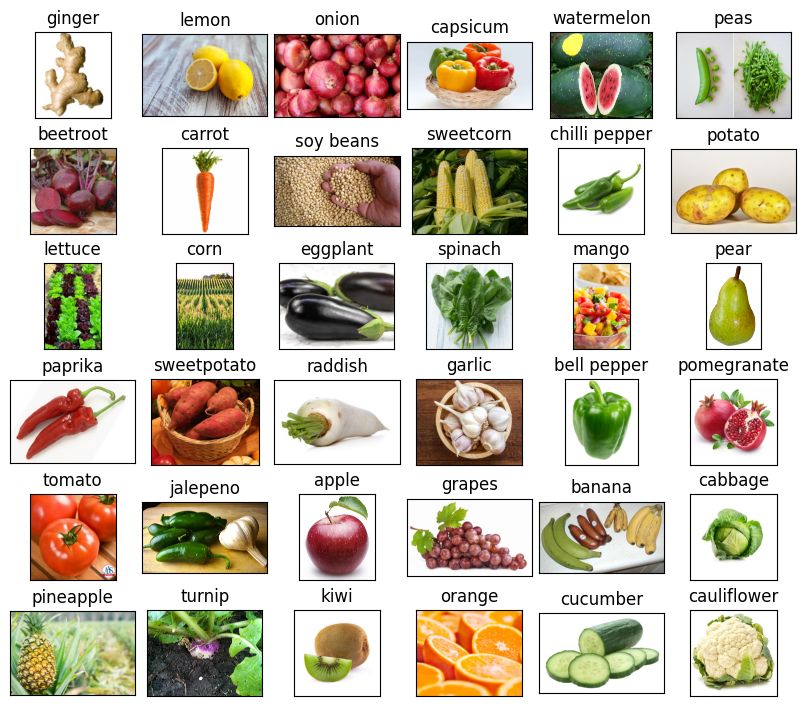

In [10]:
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [11]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [12]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 2780 validated image filenames belonging to 36 classes.


In [13]:
val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 334 validated image filenames belonging to 36 classes.


In [14]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 334 validated image filenames belonging to 36 classes.


In [15]:
weights_path = '/kaggle/input/datamodel/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5'

In [17]:
!pip install tensorflow

In [18]:
import tensorflow as tf

In [19]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet",  # Load ImageNet weights from the default location
    pooling="avg"
)

9406464/9406464 [==============================] - 0s 0us/step


In [20]:
pretrained_model.trainable = False

In [21]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(36, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/5
87/87 [==============================] - 1311s 15s/step - loss: 1.8017 - accuracy: 0.5209 - val_loss: 0.4861 - val_accuracy: 0.8503
Epoch 2/5
87/87 [==============================] - 195s 2s/step - loss: 0.5639 - accuracy: 0.8302 - val_loss: 0.2983 - val_accuracy: 0.9222
Epoch 3/5
87/87 [==============================] - 213s 2s/step - loss: 0.3447 - accuracy: 0.8903 - val_loss: 0.2296 - val_accuracy: 0.9251
Epoch 4/5
87/87 [==============================] - 228s 3s/step - loss: 0.2156 - accuracy: 0.9345 - val_loss: 0.1994 - val_accuracy: 0.9311
Epoch 5/5
87/87 [==============================] - 217s 2s/step - loss: 0.1380 - accuracy: 0.9615 - val_loss: 0.1978 - val_accuracy: 0.9491


In [22]:
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)
# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred1 = [labels[k] for k in pred]
pred1

11/11 [==============================] - 26s 2s/step


['cauliflower',
 'pomegranate',
 'grapes',
 'cauliflower',
 'spinach',
 'apple',
 'sweetcorn',
 'peas',
 'banana',
 'pear',
 'jalepeno',
 'pineapple',
 'bell pepper',
 'garlic',
 'banana',
 'jalepeno',
 'tomato',
 'kiwi',
 'pear',
 'paprika',
 'turnip',
 'soy beans',
 'soy beans',
 'soy beans',
 'ginger',
 'cucumber',
 'apple',
 'sweetcorn',
 'peas',
 'beetroot',
 'paprika',
 'watermelon',
 'lettuce',
 'pear',
 'beetroot',
 'paprika',
 'bell pepper',
 'pomegranate',
 'sweetpotato',
 'bell pepper',
 'capsicum',
 'onion',
 'potato',
 'lettuce',
 'paprika',
 'soy beans',
 'jalepeno',
 'cabbage',
 'pear',
 'peas',
 'cucumber',
 'cabbage',
 'lettuce',
 'lettuce',
 'carrot',
 'potato',
 'jalepeno',
 'watermelon',
 'beetroot',
 'raddish',
 'tomato',
 'kiwi',
 'onion',
 'sweetcorn',
 'banana',
 'carrot',
 'ginger',
 'cucumber',
 'pineapple',
 'corn',
 'kiwi',
 'sweetcorn',
 'capsicum',
 'carrot',
 'carrot',
 'eggplant',
 'eggplant',
 'lettuce',
 'paprika',
 'sweetcorn',
 'pomegranate',
 'corn'

In [23]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = labels[y]
    return res

In [25]:
img = output('/content/drive/MyDrive/Colab Notebooks/Fruits and vegetables recognition dataset/test/banana/Image_1.jpg')
img

1/1 [==============================] - 2s 2s/step


'banana'

In [26]:
import requests
import json

api_url = 'https://api.api-ninjas.com/v1/nutrition?query={}'.format(img)
response = requests.get(api_url, headers={'X-Api-Key': 'FJCuuMBu83nEaI7CGroR8A==z88oB9CslsPk9p80'})
if response.status_code == requests.codes.ok:
    employee_string = response.text
    json_object = json.loads(employee_string)
    print(json.dumps(json_object[0], indent=4))
else:
    print("Error:", response.status_code, response.text)



{
    "name": "banana",
    "calories": 89.4,
    "serving_size_g": 100.0,
    "fat_total_g": 0.3,
    "fat_saturated_g": 0.1,
    "protein_g": 1.1,
    "sodium_mg": 1,
    "potassium_mg": 22,
    "cholesterol_mg": 0,
    "carbohydrates_total_g": 23.2,
    "fiber_g": 2.6,
    "sugar_g": 12.3
}


In [27]:
model.save('Team1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
